# Импорт Библиотек

**Основные этапы**  
- Постановка задачи
- Предобработка данных
- Формироавние признаков
- Выбор метрики качества
- Постановка модели
- Оценивание качества модели

In [1]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Импортируем датасеты и посмотрим на них глазами

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [4]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [5]:
sample_submission.head()

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


In [6]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [7]:
test.info()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [8]:
sample_submission.info()
sample_submission.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


client_id    0
default      0
dtype: int64

### Параметры
**client_id** - идентификатор клиента  
**app_date** - дата подачи заявки  
**education** - уровень образования  
**sex** - пол заёмщика  
**age** - возраст заёмщика  
**car** - флаг наличия автомобиля  
**car_type** - флаг автомобиля-иномарки  
**decline_app_cnt** - количество отказанных прошлых заявок  
**good_work** - флаг наличия «хорошей» работы  
**score_bki** - оценка по версии БКИ  
**bki_request_cnt** - количество запросов в БКИ  
**region_rating** - рейтинг региона  
**home_address** - категоризатор домашнего адреса  
**work_address** - категоризатор рабочего адреса  
**income** - доход заёмщика  
**sna** - связь заемщика с клиентами банка  
**first_time** - давность наличия информации о заемщике  
**foreign_passport** - наличие загранпаспорта  
**default** - наличие дефолта  

In [20]:
train['Train'] = 1 # помечаем трейн
test['Train'] = 0 # помечаем тест

df = train.append(test, sort=False).reset_index(drop=True)

In [14]:
test.sex.nunique()

2

In [22]:
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0.0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0.0,1


In [82]:
# объеденим признаки для более удобного анализа
num_cols = ['age','decline_app_cnt','score_bki','bki_request_cnt','income']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
date_cols = ['app_date']

In [79]:
print('Какое кол-во уникальных значений имеет каждый числовой признак')
print()

for col in num_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый числовой признак

52 - age
24 - decline_app_cnt
102618 - score_bki
40 - bki_request_cnt
1207 - income


In [80]:
print('Какое кол-во уникальных значений имеет каждый бинарный признак')
print()

for col in bin_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый бинарный признак

2 - sex
2 - car
2 - car_type
2 - good_work
2 - foreign_passport


In [83]:
print('Какое кол-во уникальных значений имеет каждый категориальный признак')
print()

for col in cat_cols:
    n = df[col].nunique()
    print('{} - {}'.format(n, col))

Какое кол-во уникальных значений имеет каждый категориальный признак

5 - education
7 - region_rating
3 - home_address
3 - work_address
4 - sna
4 - first_time


Переведем время в нормальный формат

In [24]:
from datetime import datetime

In [25]:
df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')

Нужно заполнить пропуски с образованием. Интересно как изменится распределение, если посмотрим в разрезе хорошей работы

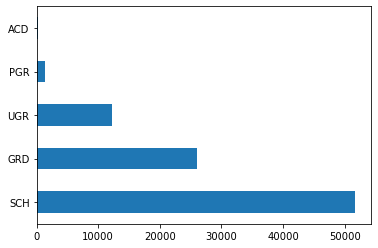

In [28]:
df[df['good_work'] == 0]['education'].value_counts().plot.barh()

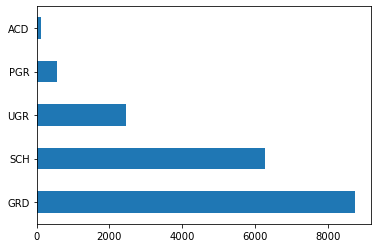

In [29]:
df[df['good_work'] == 1]['education'].value_counts().plot.barh()

мы видим, что у кого хорошая работа, то чаще образование GRD, в остальных случаях SCH.  
По такому принципу и заполним пропуски в образовании

In [30]:
def get_education(education, good_work):
    if pd.isna(education) == True and good_work == 0:
        return 'SCH'
    elif pd.isna(education) == True and good_work == 1:
        return 'GRD'
    else:
        return education

In [31]:
df['education'] = df.apply(lambda x: get_education(x['education'], x['good_work']), axis=1)

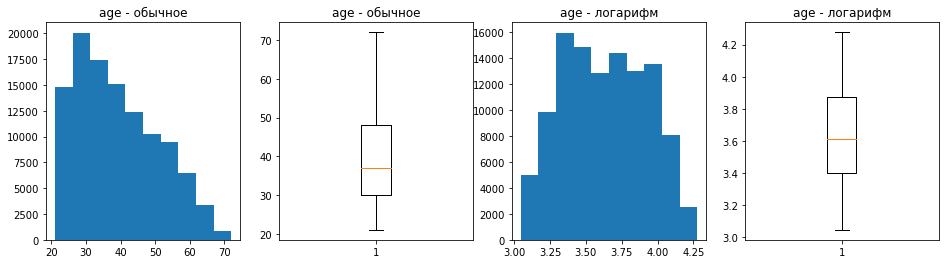

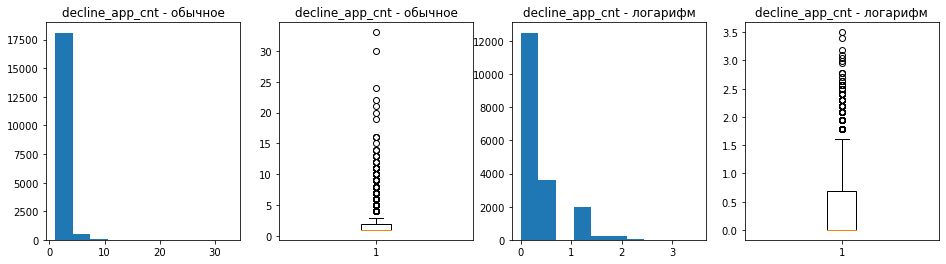

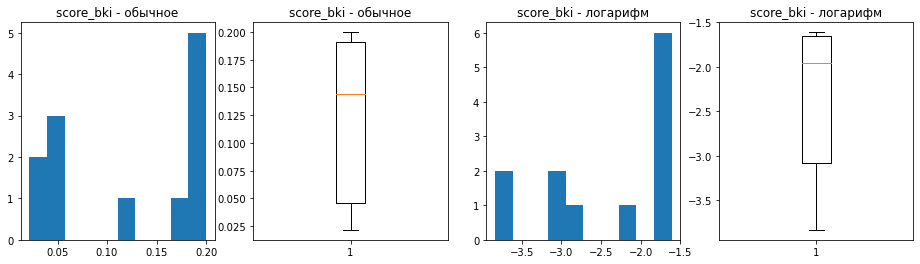

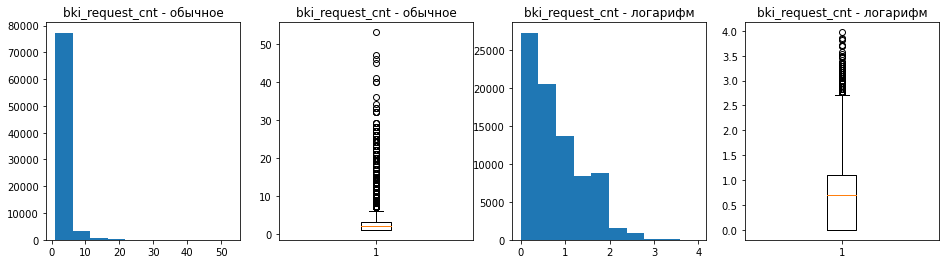

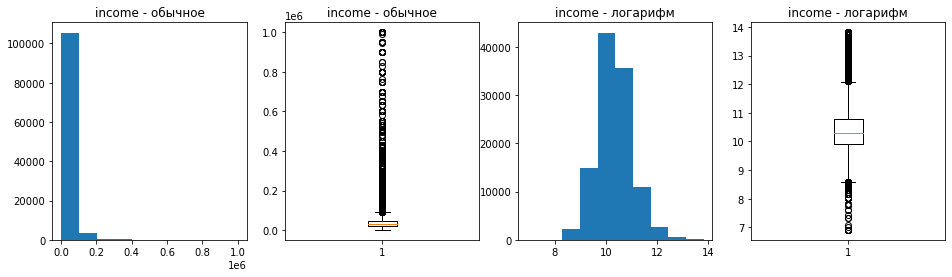

In [113]:
for i in num_cols:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].hist(df[i][df[i] > 0])
    axes[0].set_title(i + ' - обычное')
    
    axes[1].boxplot(df[i][df[i] > 0])
    axes[1].set_title(i + ' - обычное')
    
    axes[2].hist(df[i][df[i] > 0].dropna().apply(lambda x: np.log(x)))
    axes[2].set_title(i + ' - логарифм')
    
    axes[3].boxplot(df[i][df[i] > 0].dropna().apply(lambda x: np.log(x)))
    axes[3].set_title(i + ' - логарифм')

Есть смысл прологорифмировать только **age** и **income**  
Так распределение будет более нормальное

In [115]:
df[['age', 'income']] = df[['age', 'income']].apply(lambda x: np.log(x), axis=1)

Проверим корреляцию

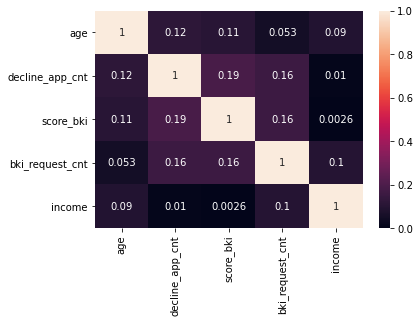

In [119]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

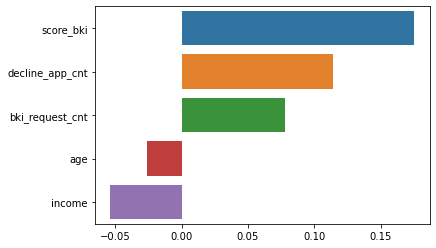

In [120]:
correlations = df[num_cols].corrwith(df['default']).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)

Корреляция низка. Соответственно это то, что нам нужно. Числовые столбцы оставляем все